In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [2]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

#### We have 614 data rows and 13 columns in the dataframe.

In [6]:
#Column Data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Point to note here is that all columns are not numeric

### Checking Null values:

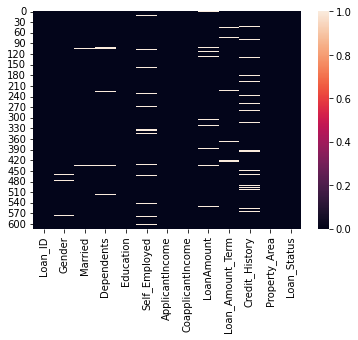

In [7]:
#Checking null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

149

In [9]:
#number of null values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### As we can see there are NULL values in whole dataframe

### Replacing NULL values: 

In [10]:
# Categorical data columns where replacing NULL with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [11]:
# Continous data columns where replacing NULL with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [12]:
#number of null values in complete dataset
df.isnull().sum().sum()

0

#### Now we can see there are no NULL values in whole dataframe

### Histogram Plots :

In [13]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()

Male      502
Female    112
Name: Gender, dtype: int64


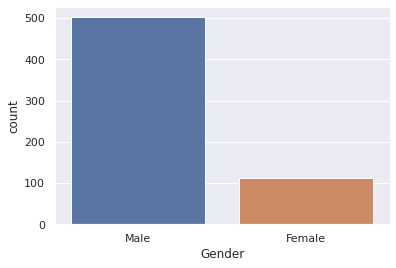

In [16]:
#Visualisation of Gender data
ax = sns.countplot(x='Gender',data=df_visualisation_nominal)
print(df_visualisation_nominal['Gender'].value_counts())

**Almost all loan applier are male. Number of female customers are only around 1/5th of number of male customers** 

Yes    401
No     213
Name: Married, dtype: int64


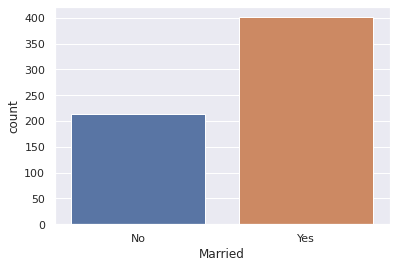

In [17]:
#Visualisation of Married data
ax = sns.countplot(x='Married',data=df_visualisation_nominal)
print(df_visualisation_nominal['Married'].value_counts())

**Most loan appliers are married around twice than number of unmarried loan appliers** 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


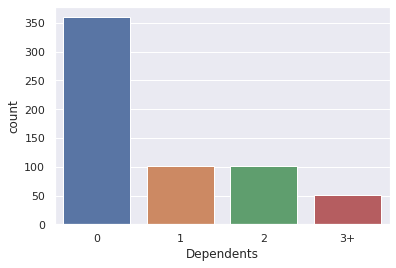

In [18]:
#Visualisation of Dependents data
ax = sns.countplot(x='Dependents',data=df_visualisation_nominal)
print(df_visualisation_nominal['Dependents'].value_counts())

**Most loan appliers have no dependents, some have 1 or 2, least have 3 or more than 3** 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


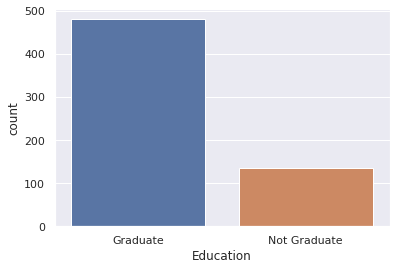

In [19]:
#Visualisation of Education data
ax = sns.countplot(x='Education',data=df_visualisation_nominal)
print(df_visualisation_nominal['Education'].value_counts())

**Number of graduate loan appliers are around 4 times the number of non-graduate loan appliers** 

No     532
Yes     82
Name: Self_Employed, dtype: int64


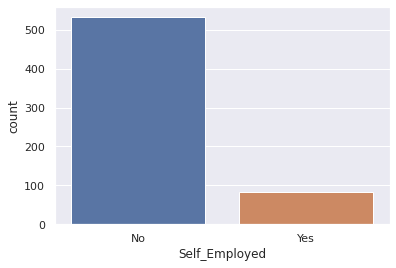

In [20]:
#Visualisation of Self_Employed data
ax = sns.countplot(x='Self_Employed',data=df_visualisation_nominal)
print(df_visualisation_nominal['Self_Employed'].value_counts())

**Almost all loan appliers are not self-employed**

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


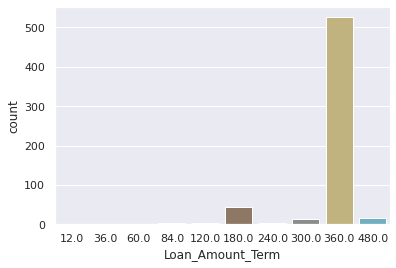

In [21]:
#Visualisation of Loan_Amount_Term data
ax = sns.countplot(x='Loan_Amount_Term',data=df_visualisation_nominal)
print(df_visualisation_nominal['Loan_Amount_Term'].value_counts())

**Almost all people are taking loan for 360 days** 

1.0    525
0.0     89
Name: Credit_History, dtype: int64


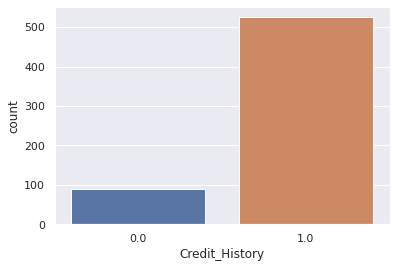

In [22]:
#Visualisation of Credit_History data
ax = sns.countplot(x='Credit_History',data=df_visualisation_nominal)
print(df_visualisation_nominal['Credit_History'].value_counts())

**Almost all loan appliers have credit history as 1.0, only some have 0.0 as credit history** 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


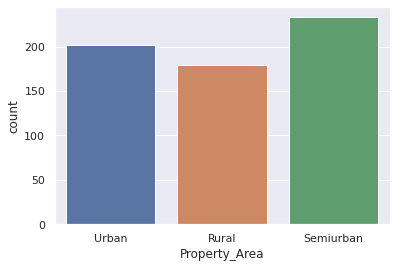

In [23]:
#Visualisation of Property_Area data
ax = sns.countplot(x='Property_Area',data=df_visualisation_nominal)
print(df_visualisation_nominal['Property_Area'].value_counts())

**People applying for loan are applying for property across diverse region** 

Y    422
N    192
Name: Loan_Status, dtype: int64


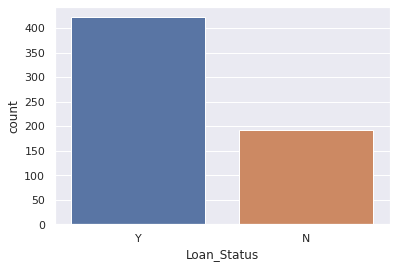

In [24]:
#Visualisation of Loan_Status data
ax = sns.countplot(x='Loan_Status',data=df_visualisation_nominal)
print(df_visualisation_nominal['Loan_Status'].value_counts())

**Most people have their loan approved but many still are rejected. We can see clearly that our target data is imbalanced** 

### Density Plots:

In [26]:
#Making dataframe of Continous data
df_visualisation_continous = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

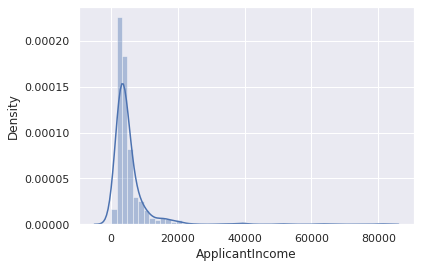

In [27]:
#Visualisation of ApplicantIncome data
sns.distplot(df_visualisation_continous['ApplicantIncome'])

**It looks skewed right**

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

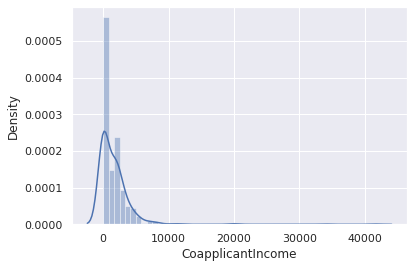

In [28]:
#Visualisation of CoapplicantIncome data
sns.distplot(df_visualisation_continous['CoapplicantIncome'])

**It is skewed right**

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

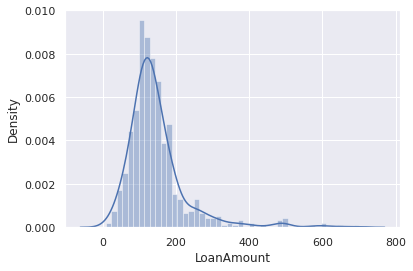

In [29]:
#Visualisation of LoanAmount data
sns.distplot(df_visualisation_continous['LoanAmount'])

**It looks skewed right with mode at around 150**

### Pairplot for the continous data columns dataframe:

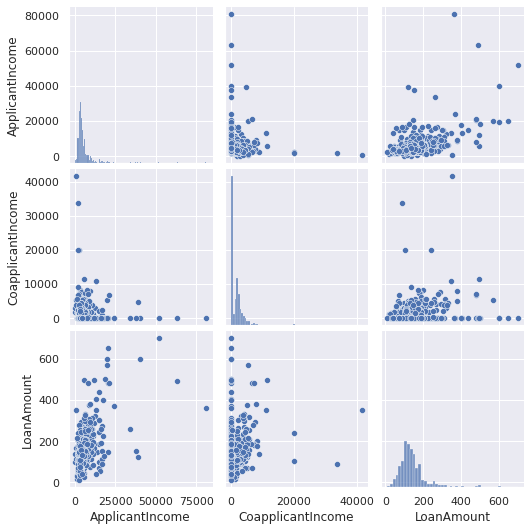

In [31]:
sns.pairplot(df_visualisation_continous,height=2.5)

#### Visualisation is completed

### Encoding of Dataframe(Converting String to numeric):

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [33]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


### Correlations:

<AxesSubplot:>

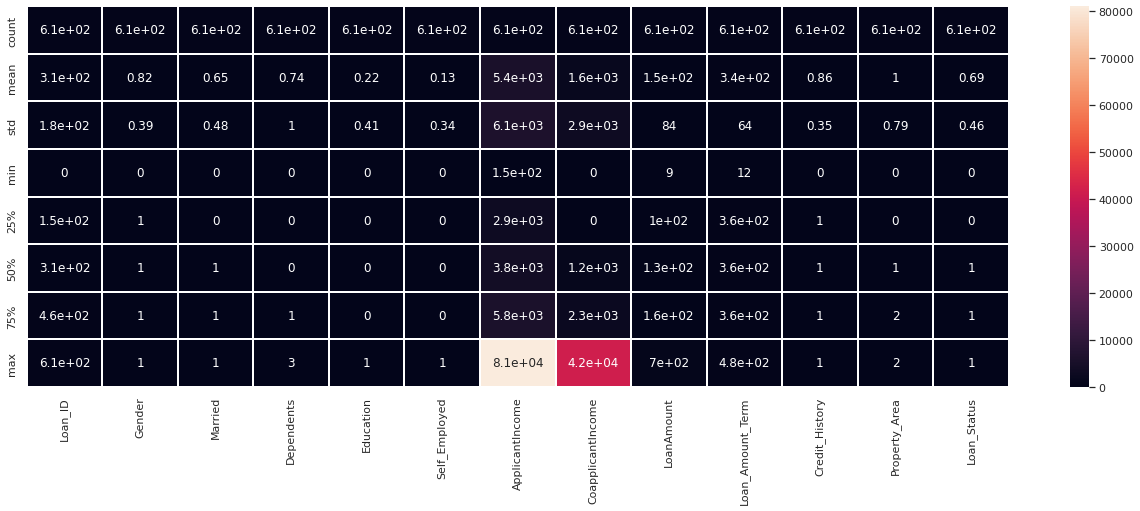

In [35]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [36]:
#Correlation matrix
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


<AxesSubplot:>

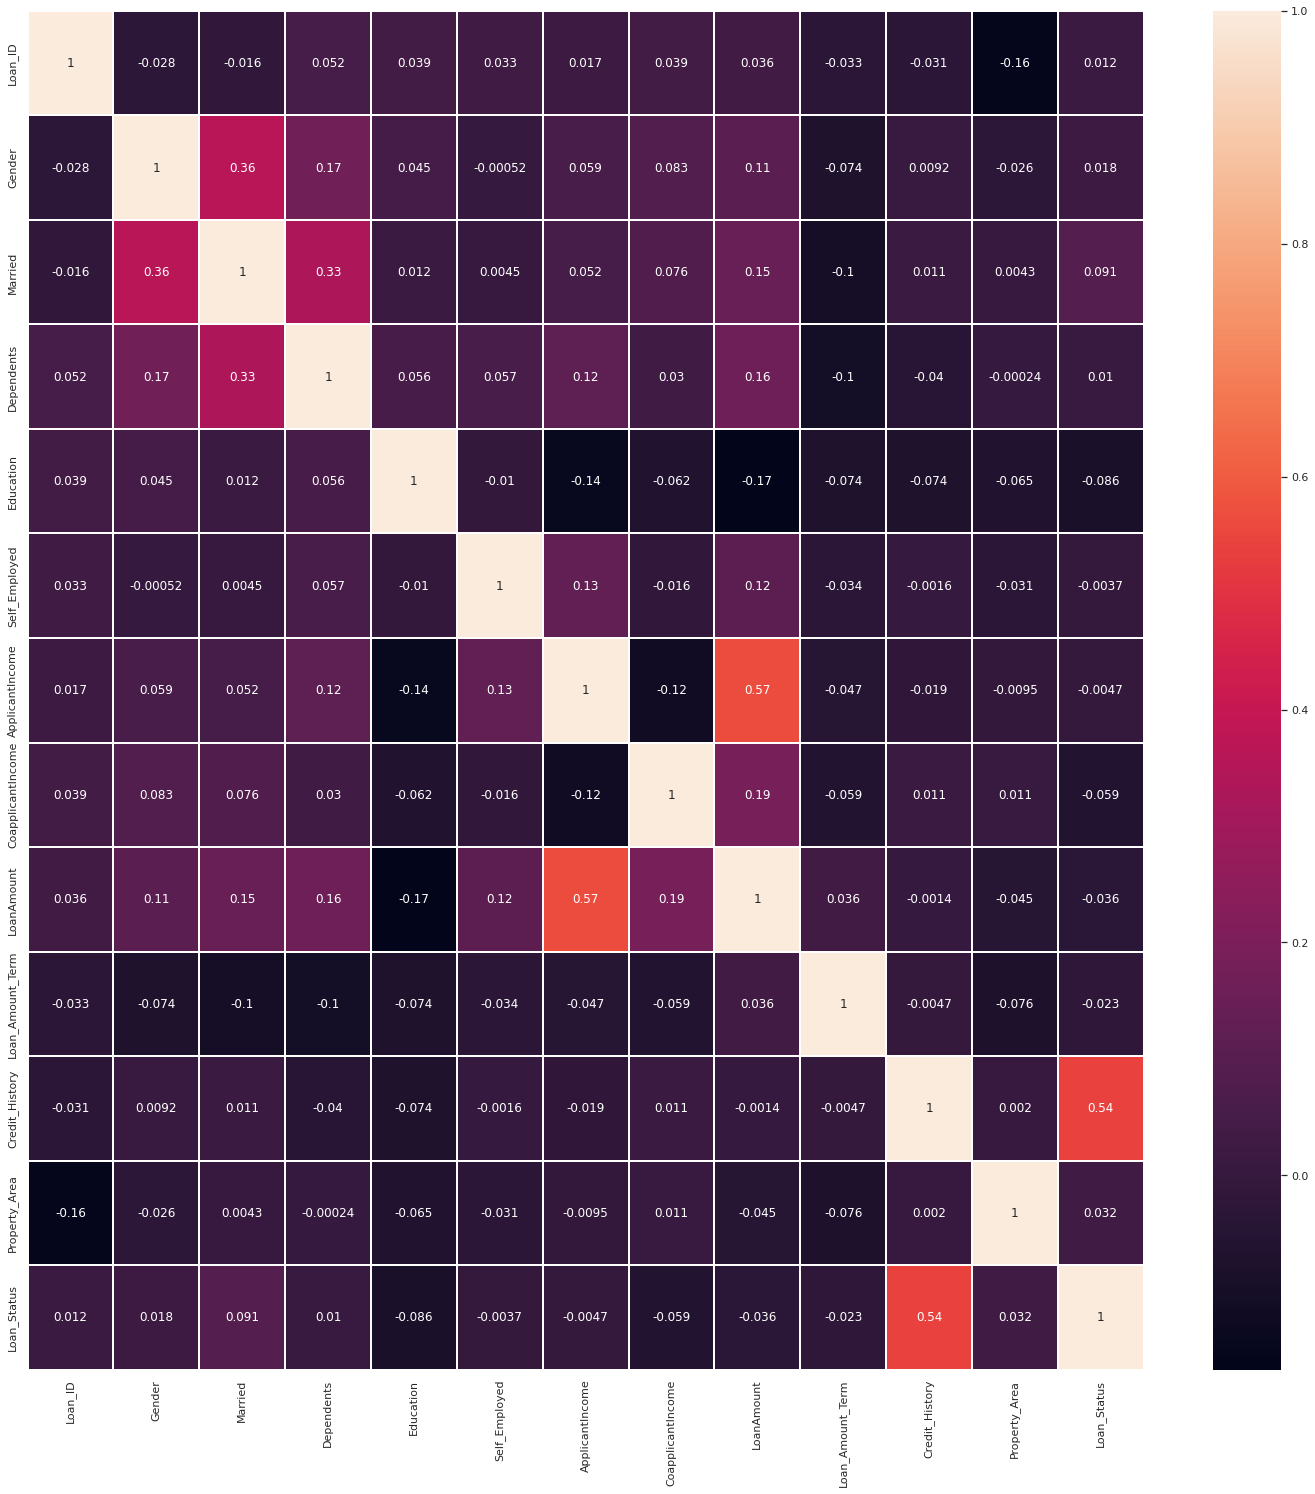

In [37]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here we can't see any high correlation as highest is 0.57

In [38]:
#Checking columns which appear to be highly correlated with target columns

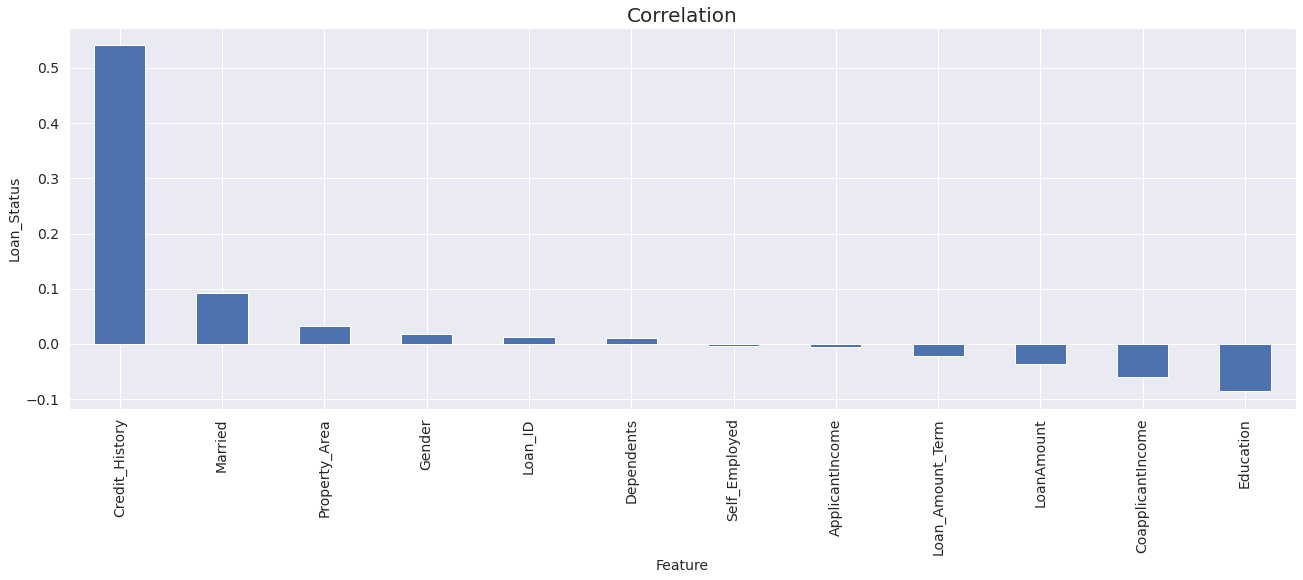

In [39]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can see good correlation but can't see any very high correlation with target column

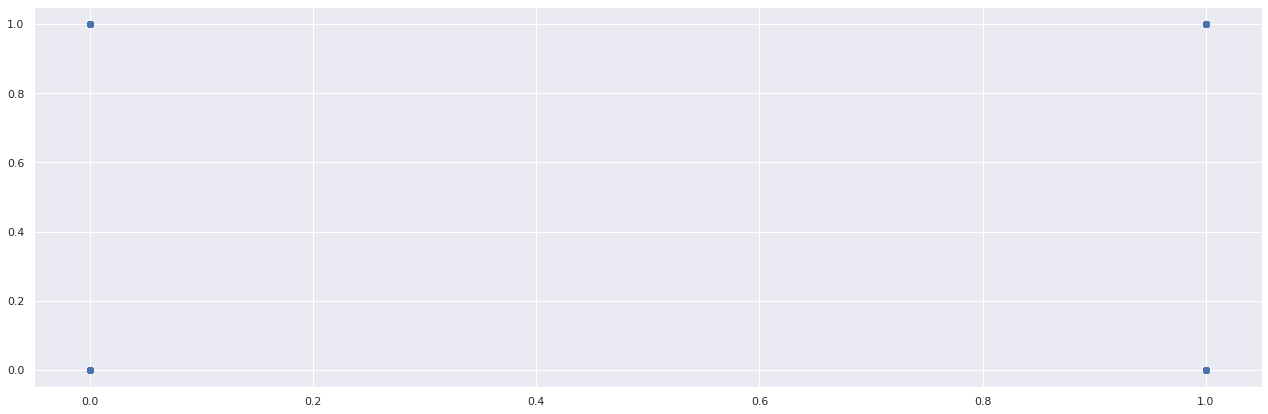

In [40]:
#Checking correlation between Loan_Status and Credit_History
plt.figure(figsize=(22,7))
plt.scatter(df.Loan_Status,df.Credit_History)
plt.show()

#### We can't see very high correlation between these 2

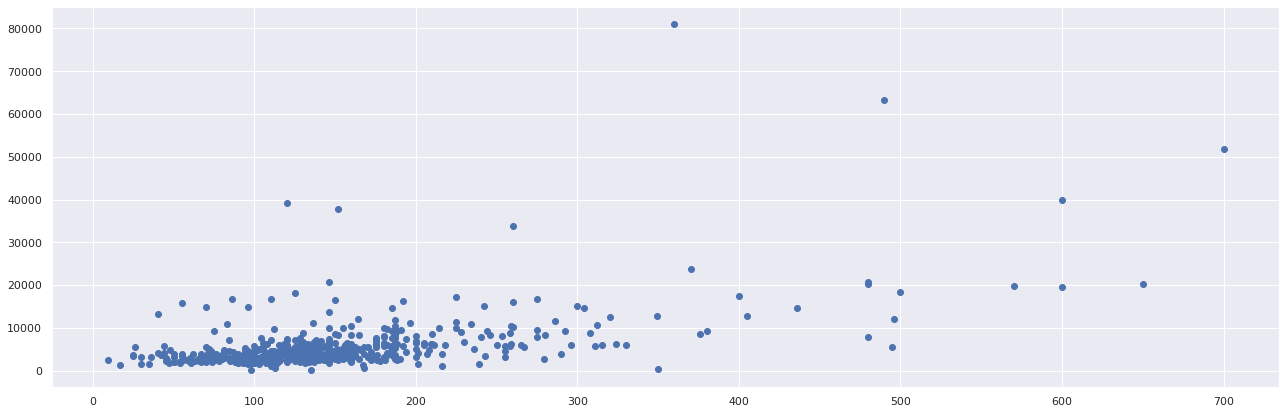

In [41]:
#Checking correlation between LoanAmount and ApplicantIncome
plt.figure(figsize=(22,7))
plt.scatter(df.LoanAmount,df.ApplicantIncome)
plt.show()

#### We can't see very high correlation between these 2

### Checkin VIF for confirmation of above conclusion:

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
X1 = df[['Loan_Status','Credit_History']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [44]:
print(vif_dF)

          feature       VIF
0     Loan_Status  4.491637
1  Credit_History  4.491637


### As we can see there is low correlation

In [45]:
X2 = df[['LoanAmount','ApplicantIncome']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [46]:
print(vif_dF)

           feature       VIF
0       LoanAmount  2.612983
1  ApplicantIncome  2.612983


### As we can see here correlation is low (< 10)

### Removing Skewness :

In [47]:
#Checking skewness
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

In [48]:
from scipy.stats import yeojohnson
df.ApplicantIncome = yeojohnson(df.ApplicantIncome)[0]
df.CoapplicantIncome = yeojohnson(df.CoapplicantIncome)[0]
df.LoanAmount = yeojohnson(df.LoanAmount)[0]

#### Now all continous columns are in acceptable skew range

### Removing outliers :

In [49]:
#Outlier check
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Loan_ID                 AxesSubplot(0.125,0.772143;0.0824468x0.107857)
Gender               AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
Married              AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
Dependents           AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
Education            AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
Self_Employed        AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
ApplicantIncome      AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
CoapplicantIncome    AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
LoanAmount              AxesSubplot(0.125,0.642714;0.0824468x0.107857)
Loan_Amount_Term     AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
Credit_History       AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
Property_Area        AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
Loan_Status          AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
dtype: object

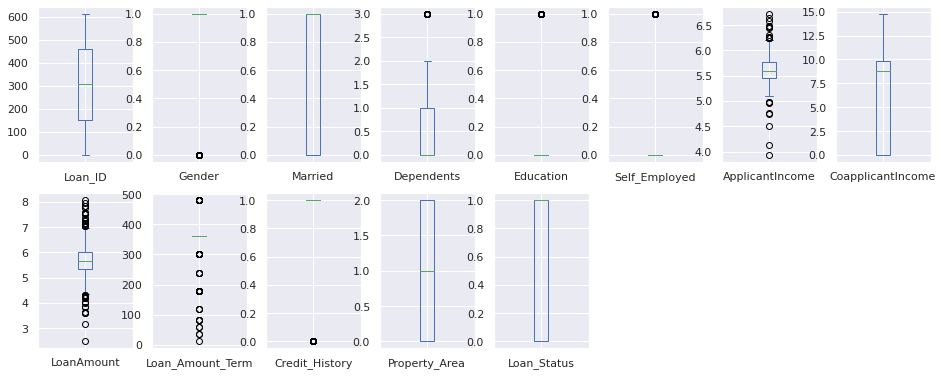

In [50]:
#Checking only for continous data types
df.plot.box(layout =(6,8),subplots=True,figsize=(16,20))

### There looks like outliers in some columns so now we check with z-score:

In [51]:
#Outlier removal using z-score
df.shape

(614, 13)

In [52]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 185,
        188, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 500,
        546, 555, 561, 568, 575, 585, 600]),
 array([8, 9, 9, 8, 9, 8, 8, 9, 6, 8, 6, 8, 6, 6, 6, 9, 9, 9, 6, 8, 6, 6,
        6, 9, 9, 6, 9, 8, 8, 8, 9, 9, 6]))

In [53]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5.768597,0.000000,5.845650,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,5.666179,9.149313,5.664964,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,5.482132,0.000000,4.798975,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,5.415221,9.845889,5.578787,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,5.779154,0.000000,5.794843,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,5.467063,0.000000,4.892417,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,5.619198,0.000000,4.172296,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,5.900037,6.473875,6.598067,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,5.874872,0.000000,6.178862,360.0,1.0,2.0,1.0


In [54]:
df_new_z.shape

(586, 13)

In [55]:
#Data Loss
Data_loss = (614-586)/614*100
Data_loss

4.5602605863192185

#### As we can see outliers have been removed

## Separating the columns into features and target:

In [58]:
feature = df_new_z.drop("Loan_Status",axis=1)
target = df_new_z["Loan_Status"]

### Upsampling to remove Imbalance classification of target variable (Loan_Status):

In [59]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print(Counter(target))

# Using oversampling
oversample = RandomOverSampler(sampling_strategy='minority')

feature_over, target_over = oversample.fit_resample(feature, target)

print(Counter(target_over))

Counter({1.0: 402, 0.0: 184})
Counter({1.0: 402, 0.0: 402})


### Model 1:

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature_over,target_over,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(accuracy_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(accuracy_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.76049766718507
At random state 0 the testing accuracy is : 0.6335403726708074


At random state 1 the training accuracy is : 0.7278382581648523
At random state 1 the testing accuracy is : 0.7204968944099379


At random state 2 the training accuracy is : 0.7060653188180405
At random state 2 the testing accuracy is : 0.7329192546583851


At random state 3 the training accuracy is : 0.7247278382581649
At random state 3 the testing accuracy is : 0.7391304347826086


At random state 4 the training accuracy is : 0.7216174183514774
At random state 4 the testing accuracy is : 0.7204968944099379


At random state 5 the training accuracy is : 0.7309486780715396
At random state 5 the testing accuracy is : 0.6956521739130435


At random state 6 the training accuracy is : 0.7231726283048211
At random state 6 the testing accuracy is : 0.7329192546583851


At random state 7 the training accuracy is : 0.71850699844479
At random state 7 the testing accurac

In [64]:
features_train,features_test,target_train,target_test = train_test_split(feature_over,target_over,test_size = 0.2,random_state = 1)

In [65]:
lr.fit(features_train,target_train)

LogisticRegression()

In [66]:
pred_test = lr.predict(features_test)

In [67]:
print(accuracy_score(target_test,pred_test))

0.7204968944099379


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix for model : \n",confusion_matrix(target_test,pred_test))
print("Classification Report for train data : \n",classification_report(target_train,pred_train))
print("Classification Report for test data : \n",classification_report(target_test,pred_test))

Confusion matrix for model : 
 [[41 40]
 [ 5 75]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       0.55      0.33      0.41       321
         1.0       0.52      0.73      0.61       322

    accuracy                           0.53       643
   macro avg       0.53      0.53      0.51       643
weighted avg       0.53      0.53      0.51       643

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.89      0.51      0.65        81
         1.0       0.65      0.94      0.77        80

    accuracy                           0.72       161
   macro avg       0.77      0.72      0.71       161
weighted avg       0.77      0.72      0.71       161



### Cross Validation of model:

In [69]:
Train_accuracy = accuracy_score(target_train,pred_train)
Test_accuracy = accuracy_score(target_test,pred_test)

In [70]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,feature_over,target_over,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.42910447761194026 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 3 the cv score is 0.5796019900497512 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 4 the cv score is 0.6442786069651741 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 5 the cv score is 0.6603493788819875 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 6 the cv score is 0.6741293532338308 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 7 the cv score is 0.6778032036613272 and accuracy score for training is 0.5287713841368584 and accuracy score for testing is 0.7204968944099379


At cross fold 8 the cv score is 0.69539

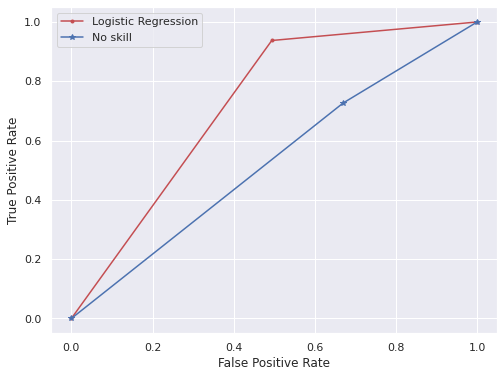

In [71]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression', color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

We can see in the auc-roc curve above 

### Trying other models:

In [72]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
    print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
    print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
    print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
    
    Train_accuracy = accuracy_score(target_train,model_1_pred_train)
    Test_accuracy = accuracy_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature_over,target_over,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")
        
    #Plotting auc_roc curve
    plt.figure(figsize=(8,6))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
    lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

    plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
    plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

### Model 2:

Accuracy for the training model :  0.7387247278382582
Accuracy for the testing model :  0.6024844720496895
Confusion matrix for model : 
 [[53 28]
 [36 44]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       321
         1.0       0.78      0.66      0.72       322

    accuracy                           0.74       643
   macro avg       0.74      0.74      0.74       643
weighted avg       0.74      0.74      0.74       643

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.60      0.65      0.62        81
         1.0       0.61      0.55      0.58        80

    accuracy                           0.60       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.60      0.60      0.60       161

At cross fold 2 the cv score is 0.3743781094527363 and accuracy score for training is 0.7387247278382582 and

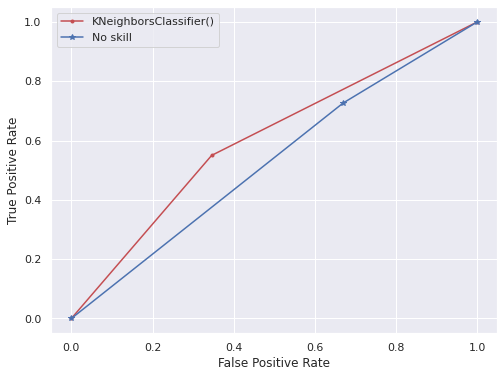

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model_selection(KNeighborsClassifier(),features_train,target_train,features_test,target_test)

### Model 3:

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.8944099378881988
Confusion matrix for model : 
 [[74  7]
 [10 70]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       321
         1.0       1.00      1.00      1.00       322

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        81
         1.0       0.91      0.88      0.89        80

    accuracy                           0.89       161
   macro avg       0.90      0.89      0.89       161
weighted avg       0.89      0.89      0.89       161

At cross fold 2 the cv score is 0.48756218905472637 and accuracy score for training is 1.0 and accuracy score for testing i

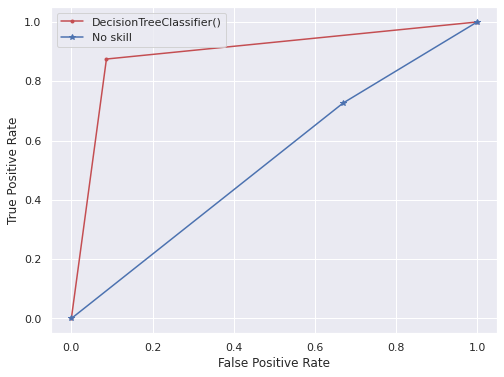

In [74]:
from sklearn.tree import DecisionTreeClassifier
model_selection(DecisionTreeClassifier(),features_train,target_train,features_test,target_test)

### Model 4:

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.8881987577639752
Confusion matrix for model : 
 [[70 11]
 [ 7 73]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       321
         1.0       1.00      1.00      1.00       322

    accuracy                           1.00       643
   macro avg       1.00      1.00      1.00       643
weighted avg       1.00      1.00      1.00       643

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.91      0.86      0.89        81
         1.0       0.87      0.91      0.89        80

    accuracy                           0.89       161
   macro avg       0.89      0.89      0.89       161
weighted avg       0.89      0.89      0.89       161

At cross fold 2 the cv score is 0.48507462686567165 and accuracy score for training is 1.0 and accuracy score for testing i

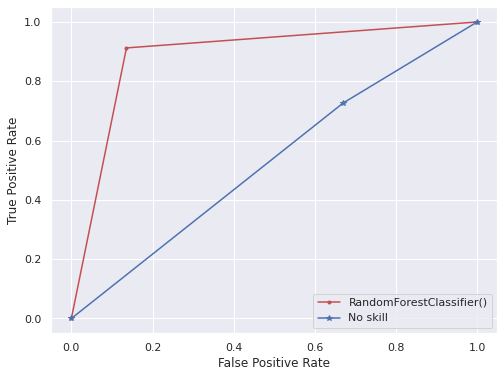

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_selection(RandomForestClassifier(),features_train,target_train,features_test,target_test)

### Conclusion: Here DecisionTreeClassifier() gives best accuracy hence taking it as main model

### Ensemble technique:

In [76]:
from sklearn.model_selection import GridSearchCV

#using 4 parameters
parameters = {'criterion':['entropy','gini'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'max_depth':[2,3,5]}
rf = DecisionTreeClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 5}


In [77]:
rf = DecisionTreeClassifier(criterion = "gini", max_features = "auto", max_depth = 5, min_samples_split = 5)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = accuracy_score(target_test,pred_decision)
print('Accuracy score: ', abs(rfs)*100)

rfscore = cross_val_score(rf,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

Accuracy score:  70.80745341614907
Cross Validation score:  76.64457535591556


### Conclusion : We got Accuracy score as 70.81% 